In [1]:
import folium

In [2]:
m = folium.Map(location =[37.5665, 126.9780], tiles='Stamen Toner')

In [3]:
m

In [4]:
m = folium.Map(location =[37.5665, 126.9780])
m

In [5]:
m = folium.Map(location =[37.5665, 126.9780], tiles='Stamen Terrain')
m

### Marker 

In [6]:
m = folium.Map(location =[37.5665, 126.9780], tiles='Stamen Terrain')

location = [37.5665, 126.9780]
popup = '<i>Mt.Hood Meadows</i>'
icon = folium.Icon(icon ='cloud')
folium.Marker(location,popup=popup, icon=icon).add_to(m)

m

### CircleMarker vs Circle
- CircleMarker : 동적인 마커
- Circle : 정적인 마커

In [7]:
m2 = folium.Map(location =[37.5665, 126.9780], tiles='Stamen Terrain')

folium.features.CircleMarker(location=[37.5311, 126.9113],
                            radius=50,
                            popup='Laurelhurst Park',
                            color='#3186cc',
                            fill=True,
                            fill_color='#3186cc'
).add_to(m2)
m2

In [8]:
folium.features.Circle(radius=100,
                      location=[37.5248, 126.9375],
                      popup='The Waterfront',
                      color='crimson',
                      fill=True,
                      ).add_to(m2)
m2

### Polygon Marker

In [16]:
m3 = folium.Map(location =[37.5665, 126.9780], tiles='Stamen Terrain')

folium.features.PolygonMarker(locations = [
                [37.5225, 126.9380],[37.5238, 126.9339],[37.5220, 126.9355],[37.5217, 126.9387],[37.5241, 126.9399]],
            color='blue', weight=10, fill_color='red',
            fill_opacity=0.5, popup='Tokyo, Japan').add_to(m3)
m3

### LatLngPopup

In [17]:
m2.add_child(folium.LatLngPopup())

### ClickForMarker 

In [18]:
m.add_child(folium.ClickForMarker(popup="ClickPoint"))

### Vincent/Vega Marker 

In [20]:
import json

In [22]:
m4 = folium.Map(location =[37.5665, 126.9780], tiles='Stamen Terrain')

folium.RegularPolygonMarker([37.5169, 126.9268],
                           fill_color='red',
                           radius=50,
                           popup=folium.Popup(max_width=450).add_child(
                               folium.Vega(json.load(open('seoul_geo_simple.json', encoding='utf-8')), width=450, height=250))
                           ).add_to(m4)
m4

### How to folium.Vega 
- view source --> raw --> save as json format

In [42]:
import seaborn as sns
import pandas as pd
import pdvega

In [43]:
data = sns.load_dataset('iris')

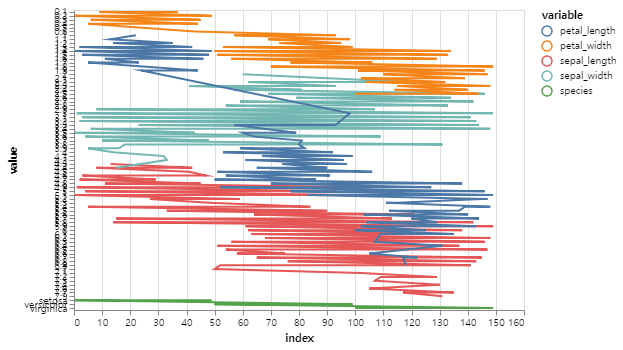

In [45]:
data.vgplot()

### Topo Json vs Geo Json
- 데이터 저장 형식의 차이

In [71]:
#Topo Json
m1 = folium.Map(location=[37.5665, 126.9780], tiles='Mapbox Bright')
seoul_geo_json = r'seoul_municipalities_geo_simple.json'
seoul_topo_json = r'seoul_municipalities_topo_simple.json'

folium.TopoJson(open(seoul_topo_json, encoding='utf-8'),
               "objects.seoul_municipalities_geo",
               name='topojson',
               ).add_to(m1)
folium.LayerControl().add_to(m1)
m1

In [84]:
#GeoJson
m2 = folium.Map(location=[37.5665, 126.9780], tiles='Mapbox Bright')

folium.GeoJson(open(seoul_geo_json, 'r',encoding='utf-8').read(),
               name='geojson',
               ).add_to(m2)
folium.LayerControl().add_to(m2)
m2

### Choropleth maps 
- 등치지역도
- 데이터 값의 크기에 따라 지역별로 색을 다르게 표시하는 지도. 범주형 데이터라면 서로 다른 색상들로 구분하고, 연속형 데이터라면 한 색상의 명도를 몇 단계로 나누어 적용하는 방법으로 지역별 데이터를 표시할 수 있다

 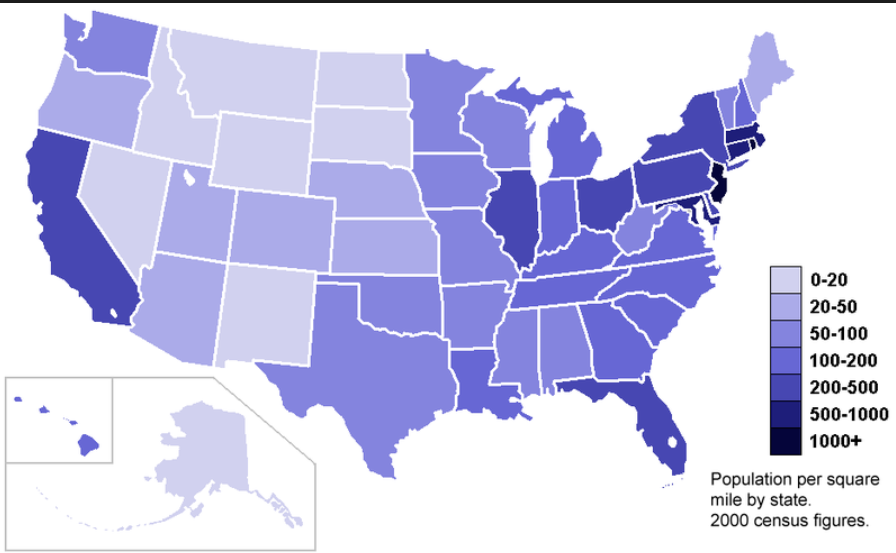